In [1]:
from datetime import date
import hisepy
import os
import pandas as pd
import scanpy as sc

## Read subclustering results from HISE

In [2]:
cell_class = 'nk-cells'

In [3]:
h5ad_uuid = 'c4ea7595-51dc-4413-aa8c-c18949a48ef0'
h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)

In [4]:
if not os.path.isdir(h5ad_path):
    hise_res = hisepy.reader.cache_files([h5ad_uuid])

In [5]:
h5ad_filename = os.listdir(h5ad_path)[0]
h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)

In [6]:
adata = sc.read_h5ad(h5ad_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 160848 × 1357
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id', 'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1', 'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5', 'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'leiden_resolution_1', 'leiden_reso

## Read annotations

In [8]:
anno_file = 'annotations/NK_Cells_Res1.5_Annotation.csv'

In [9]:
anno = pd.read_csv(anno_file)

In [10]:
anno.head()

,Unnamed: 0,leiden_resolution_1.5,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
0,0,0,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
1,1,1,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
2,2,2,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
3,3,3,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
4,4,4,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes


In [11]:
join_col = 'leiden_resolution_1.5'

In [12]:
anno[join_col] = anno[join_col].astype('string').astype('category')

In [14]:
obs = adata.obs

In [15]:
sum(obs['leiden_resolution_1.5'].isin(anno['leiden_resolution_1.5']))

160848

In [16]:
obs_anno = obs.merge(anno, how = 'left', on = 'leiden_resolution_1.5')

In [17]:
adata.obs = obs_anno
adata.obs = adata.obs.set_index('barcodes', drop = False)

In [18]:
adata.obs.head()

,barcodes,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,n_reads,...,leiden_resolution_1,leiden_resolution_1.5,leiden_resolution_2,Unnamed: 0,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
barcodes,,,,,,,,,,,,,,,,,,,,,
cf72d2f048b611ea8957bafe6d70929e,cf72d2f048b611ea8957bafe6d70929e,B001,shrewd_chocolaty_xrayfish,cf72d2f048b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1229,51,8644,...,4,12,11,12,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
cf73d29048b611ea8957bafe6d70929e,cf73d29048b611ea8957bafe6d70929e,B001,subocean_bold_oriole,cf73d29048b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,2005,246,18676,...,7,10,13,10,NK+T Doublets,NK cell,Yes,NK+T Doublets,Yes,Yes
cf73ecda48b611ea8957bafe6d70929e,cf73ecda48b611ea8957bafe6d70929e,B001,observant_fathomable_barracuda,cf73ecda48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,921,37,5216,...,3,4,4,4,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
cf7430b448b611ea8957bafe6d70929e,cf7430b448b611ea8957bafe6d70929e,B001,omniscient_slim_hoki,cf7430b448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,2153,117,16241,...,2,0,0,0,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes
cf754e0448b611ea8957bafe6d70929e,cf754e0448b611ea8957bafe6d70929e,B001,glossy_intimate_ladybug,cf754e0448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1497,131,9952,...,11,13,14,13,GZMK- CD56dim NK cell,NK cell,Yes,CD56dim NK cell,Yes,Yes


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

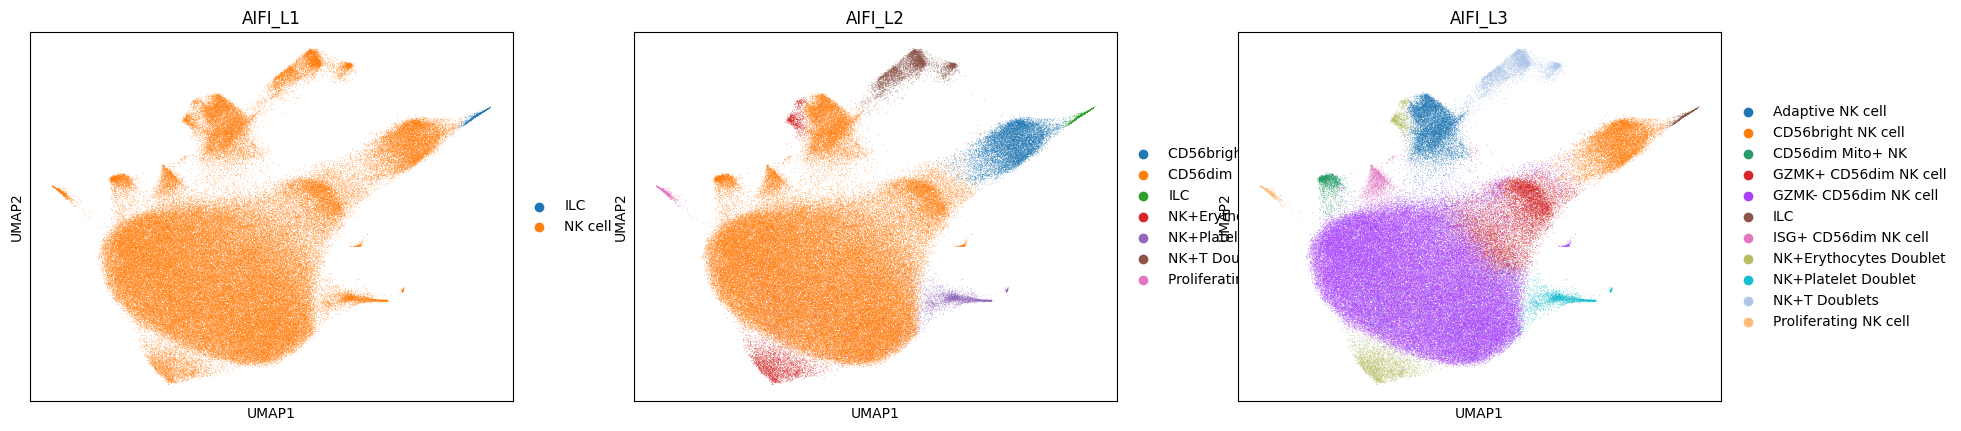

In [19]:
sc.pl.umap(adata, color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'])